In [1]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [2]:
from tqdm.auto import tqdm
import tensorflow as tf


In [3]:
!pip install transformers

In [4]:
from transformers import BertTokenizer

In [5]:
import pandas as pd
import numpy as np
import random
import os
import gc
from PIL import Image
from textwrap import wrap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [6]:
num_words = 10000
max_review_len = 200

In [7]:
#assign column names manualy
dataset = pd.read_csv('./yelp_review_polarity_csv/test.csv',
                   header=None,
                   names=['Label', 'Review'])


In [8]:
dataset

,Label,Review
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...
...,...,...
37995,1,If I could give 0...I would. Don't do it.
37996,2,Items Selected:\nChocolate Cinnamon Horn\nSmal...
37997,1,Expensive lunch meals. Fried pickles were goo...
37998,1,Highly overpriced and food was cold. Our waitr...


In [9]:
dataset.head()

,Label,Review
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   38000 non-null  int64 
 1   Review  38000 non-null  object
dtypes: int64(1), object(1)
memory usage: 593.9+ KB


<AxesSubplot:xlabel='Label', ylabel='count'>

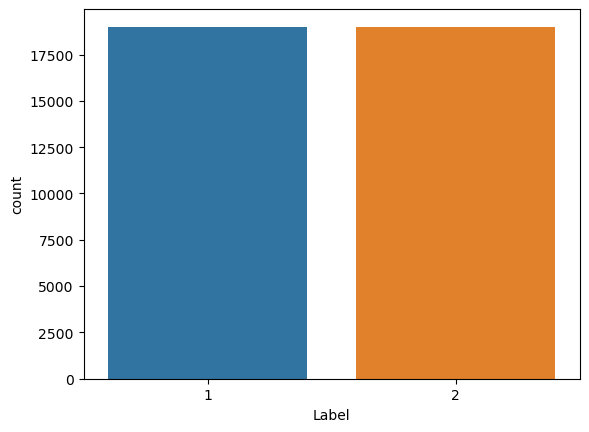

In [11]:
sns.countplot(x='Label', data=dataset)

<AxesSubplot:xlabel='Label', ylabel='count'>

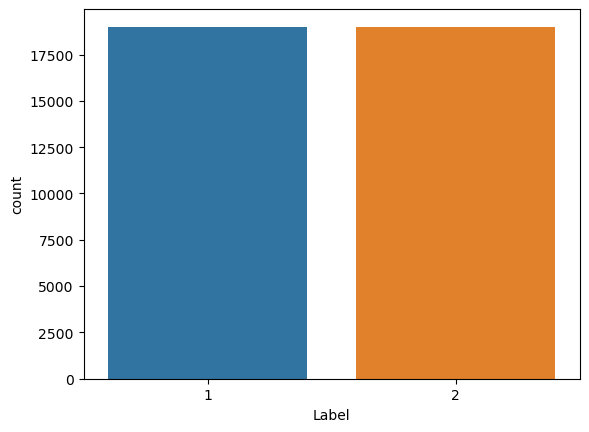

In [12]:
sns.countplot(x='Label', data=dataset)

## Calculate sentiment score using VADER

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [14]:
example = dataset['Review'][10]
print(example)

Meh, I've experienced better is an understatement.\n\nFriday's is like the \"fine dining chain\" for every yinzer in Pittsburgh...\n\n1.  When we were seated, it was quick which was a surprise.  Somehow this restaurant gets packed and I never understand why.  I was happy about that.\n2.  I ordered one of their \"skinny margaritas\", blackberry to be exact.  It was a nice size, however, at $6.00/pop, that was half of my food bill.\n3.  The waitress started off attentive, but after our food came out she was gone.  I ordered a turkey burger with pickle and mustard.  Loaded mashed potato on the side because I wanted heartburn ha!\n4.  Food came.  My burger had lettuce on it only.  Waitress was supposed to go and get our next round of drinks.  I had to wait to ask for my pickle.\n5.  The loaded potatoes were more like rubber than potatoes and not what I was expecting.  Disappointment.\n6.  The waitress then went into oblivion and only returned with our check.  \n\nNever again will I eat at 

In [16]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Meh',
 ',',
 'I',
 "'ve",
 'experienced',
 'better',
 'is',
 'an',
 'understatement.\\n\\nFriday',
 "'s"]

In [17]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Meh', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ("'ve", 'VBP'),
 ('experienced', 'VBN'),
 ('better', 'RBR'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('understatement.\\n\\nFriday', 'NN'),
 ("'s", 'POS')]

In [18]:
#using SentimentIntensityAnalyzer to get the neg/neu/pos/compound scores of the text.
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [19]:
import nltk

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
check = SentimentIntensityAnalyzer()

In [23]:
check.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [24]:
check.polarity_scores('I am not so happy!')

{'neg': 0.575, 'neu': 0.425, 'pos': 0.0, 'compound': -0.62}

In [25]:
check.polarity_scores('I dislike cricket!')

{'neg': 0.743, 'neu': 0.257, 'pos': 0.0, 'compound': -0.4389}

In [26]:
#polarity score for dataset
res = {}
for i, row in tqdm(dataset.iterrows(), total=len(dataset)):
    text = row['Review']
    res[text] = check.polarity_scores(text)

  0%|          | 0/38000 [00:00<?, ?it/s]

In [27]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Review'})
vaders = vaders.merge(dataset, how='left')

In [28]:
vaders.head()

,Review,neg,neu,pos,compound,Label
0,"Contrary to other reviews, I have zero complai...",0.059,0.852,0.089,0.6059,2
1,Last summer I had an appointment to get new ti...,0.145,0.761,0.094,-0.4339,1
2,"Friendly staff, same starbucks fair you get an...",0.000,0.703,0.297,0.6705,2
3,The food is good. Unfortunately the service is...,0.179,0.725,0.096,-0.5046,1
4,Even when we didn't have a car Filene's Baseme...,0.017,0.812,0.171,0.9633,2


In [29]:
vaders.head(15)

,Review,neg,neu,pos,compound,Label
0,"Contrary to other reviews, I have zero complai...",0.059,0.852,0.089,0.6059,2
1,Last summer I had an appointment to get new ti...,0.145,0.761,0.094,-0.4339,1
2,"Friendly staff, same starbucks fair you get an...",0.000,0.703,0.297,0.6705,2
3,The food is good. Unfortunately the service is...,0.179,0.725,0.096,-0.5046,1
4,Even when we didn't have a car Filene's Baseme...,0.017,0.812,0.171,0.9633,2
5,"Picture Billy Joel's \""Piano Man\"" DOUBLED mix...",0.030,0.728,0.242,0.9917,2
6,Mediocre service. COLD food! Our food waited s...,0.135,0.801,0.064,-0.3802,1
7,Ok! Let me tell you about my bad experience fi...,0.073,0.795,0.132,0.9621,1
8,I used to love D&B when it first opened in the...,0.096,0.771,0.133,0.8145,1
9,"Like any Barnes & Noble, it has a nice comfy c...",0.019,0.676,0.305,0.9646,2


In [30]:
vaders.drop(['Label'],axis=1,inplace=True)  #drop the label 
vaders.head()

,Review,neg,neu,pos,compound
0,"Contrary to other reviews, I have zero complai...",0.059,0.852,0.089,0.6059
1,Last summer I had an appointment to get new ti...,0.145,0.761,0.094,-0.4339
2,"Friendly staff, same starbucks fair you get an...",0.000,0.703,0.297,0.6705
3,The food is good. Unfortunately the service is...,0.179,0.725,0.096,-0.5046
4,Even when we didn't have a car Filene's Baseme...,0.017,0.812,0.171,0.9633


In [31]:
#add different labels beforehand
vaders['Labels'] = pd.cut(vaders['compound'], 
                     bins=[0, 0.2, 0.4, 0.6, 0.8,1], 
                     labels=[1, 2, 3, 4, 5])

In [32]:
vaders['Labels'].fillna(value=1,inplace=True)  #to get the label of negative scores replace Nan with 1

In [33]:
vaders.head()

,Review,neg,neu,pos,compound,Labels
0,"Contrary to other reviews, I have zero complai...",0.059,0.852,0.089,0.6059,4
1,Last summer I had an appointment to get new ti...,0.145,0.761,0.094,-0.4339,1
2,"Friendly staff, same starbucks fair you get an...",0.000,0.703,0.297,0.6705,4
3,The food is good. Unfortunately the service is...,0.179,0.725,0.096,-0.5046,1
4,Even when we didn't have a car Filene's Baseme...,0.017,0.812,0.171,0.9633,5


In [34]:
vaders.to_csv('updated_dataset.csv')

In [35]:
df = pd.read_csv('updated_dataset.csv')
df.head()

,Unnamed: 0,Review,neg,neu,pos,compound,Labels
0,0,"Contrary to other reviews, I have zero complai...",0.059,0.852,0.089,0.6059,4
1,1,Last summer I had an appointment to get new ti...,0.145,0.761,0.094,-0.4339,1
2,2,"Friendly staff, same starbucks fair you get an...",0.000,0.703,0.297,0.6705,4
3,3,The food is good. Unfortunately the service is...,0.179,0.725,0.096,-0.5046,1
4,4,Even when we didn't have a car Filene's Baseme...,0.017,0.812,0.171,0.9633,5


In [36]:
#plotting polarity analysis results

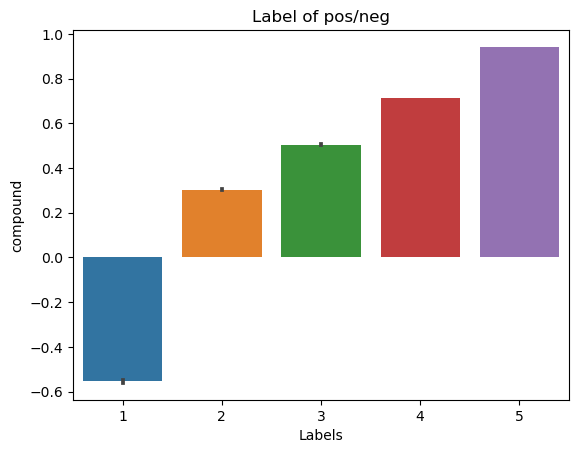

In [37]:
#plotting polarity analysis results
ax = sns.barplot(data=df, x='Labels', y='compound')
ax.set_title('Label of pos/neg')
plt.show()


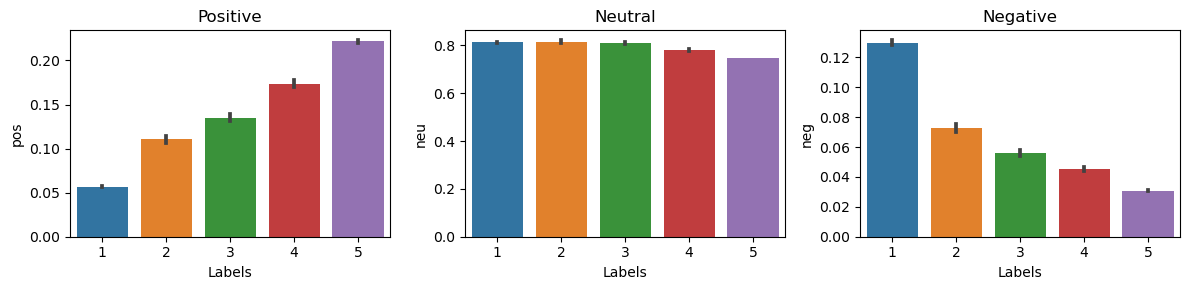

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df, x='Labels', y='pos', ax=axs[0])
sns.barplot(data=df, x='Labels', y='neu', ax=axs[1])
sns.barplot(data=df, x='Labels', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Map target label to text

In [39]:
#refer to model 2 code from here